In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\train.csv')
df1=pd.read_csv(r'C:\Users\DELL\Desktop\test.csv')

In [3]:
df.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,...,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,...,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,...,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,...,14,0,0,1,1,0,72048,0,1,0


In [4]:
df.shape

(134683, 21)

In [5]:
df.isna().sum()

Property_ID         0
room                0
layout_type         0
property_type       0
locality            0
price               0
area                0
furnish_type        0
bathroom            0
city                0
parking_spaces      0
floor               0
pet_friendly        0
power_backup        0
washing_machine     0
air_conditioner     0
geyser/solar        0
security_deposit    0
CCTV/security       0
lift                0
neighbourhood       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Property_ID         134683
room                     5
layout_type              2
property_type            6
locality              3706
price                58442
area                  7790
furnish_type             3
bathroom                 5
city                     8
parking_spaces           2
floor                   20
pet_friendly             2
power_backup             2
washing_machine          2
air_conditioner          2
geyser/solar             2
security_deposit     95810
CCTV/security            2
lift                     2
neighbourhood           41
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Property_ID       134683 non-null  int64 
 1   room              134683 non-null  int64 
 2   layout_type       134683 non-null  object
 3   property_type     134683 non-null  object
 4   locality          134683 non-null  object
 5   price             134683 non-null  int64 
 6   area              134683 non-null  int64 
 7   furnish_type      134683 non-null  object
 8   bathroom          134683 non-null  int64 
 9   city              134683 non-null  object
 10  parking_spaces    134683 non-null  int64 
 11  floor             134683 non-null  int64 
 12  pet_friendly      134683 non-null  int64 
 13  power_backup      134683 non-null  int64 
 14  washing_machine   134683 non-null  int64 
 15  air_conditioner   134683 non-null  int64 
 16  geyser/solar      134683 non-null  int

# Visualizations 

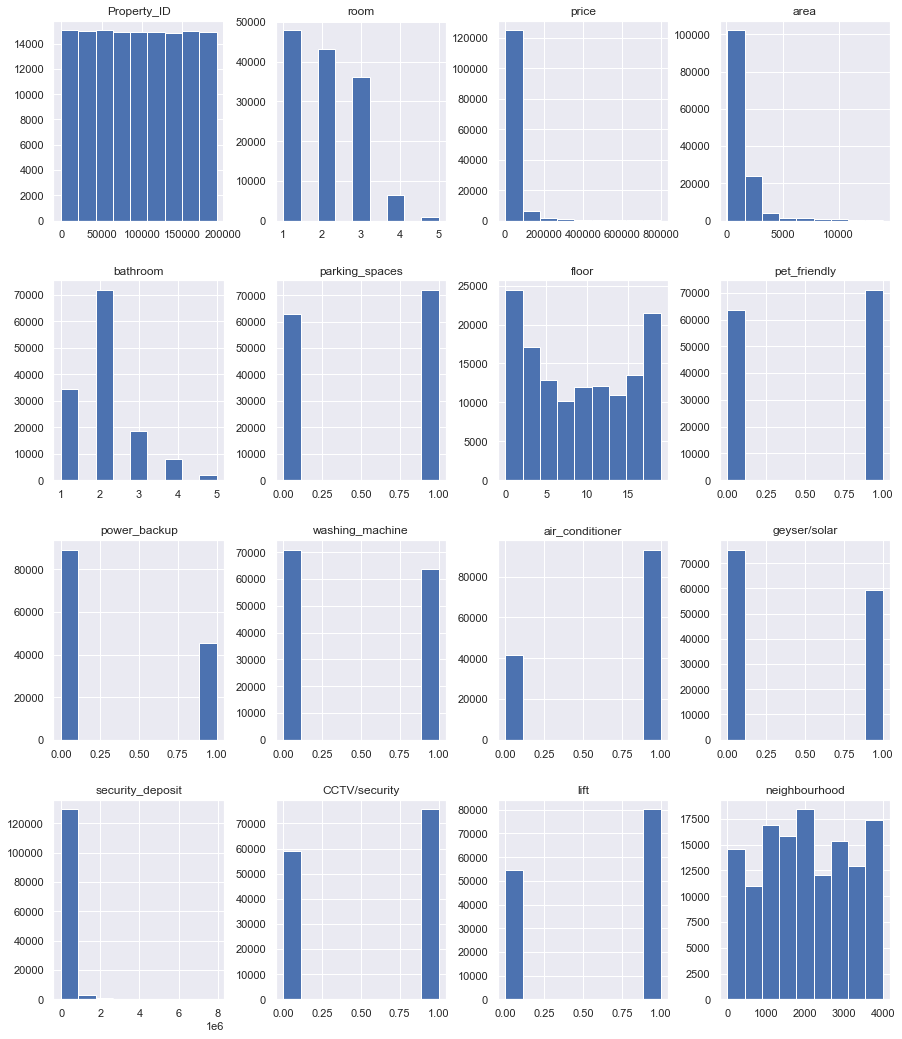

In [10]:
df.hist(bins=9,figsize=(15,18));

In [11]:
l=df.groupby('room')['room'].agg('count')
l1=df.groupby('layout_type')['layout_type'].agg('count')
l2=df.groupby('property_type')['property_type'].agg('count')
l3=df.groupby('furnish_type')['furnish_type'].agg('count')

In [12]:
pd.DataFrame(l)

,room
room,
1,47908
2,43235
3,36125
4,6465
5,950


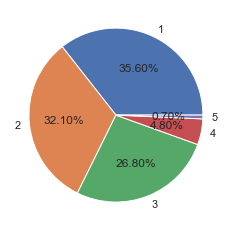

In [13]:
pie=df['room'].value_counts(normalize=True).round(3)*100
plt.pie(pie,labels=['1','2','3','4','5'],autopct='%.2f%%');

In [14]:
df['room'].value_counts()

1    47908
2    43235
3    36125
4     6465
5      950
Name: room, dtype: int64

In [15]:
pd.DataFrame(l1)

,layout_type
layout_type,
BHK,114684
RK,19999


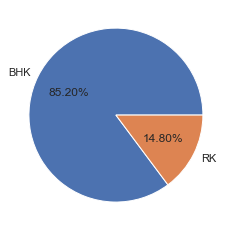

In [16]:
pie=df['layout_type'].value_counts(normalize=True).round(3)*100
plt.pie(pie,labels=['BHK','RK'],autopct='%.2f%%');

In [17]:
pd.DataFrame(l2)

,property_type
property_type,
Apartment,86819
Independent Floor,25850
Independent House,13408
Penthouse,492
Studio Apartment,5723
Villa,2391


In [18]:
df['property_type'].value_counts()

Apartment            86819
Independent Floor    25850
Independent House    13408
Studio Apartment      5723
Villa                 2391
Penthouse              492
Name: property_type, dtype: int64

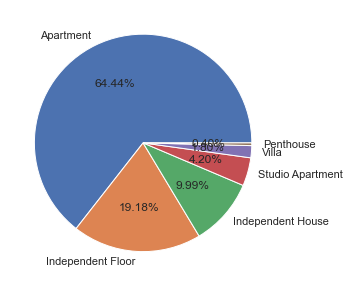

In [19]:
plt.figure(figsize=(10,5))
pie=df['property_type'].value_counts(normalize=True).round(3)*100
plt.pie(pie,labels=['Apartment','Independent Floor','Independent House','Studio Apartment','Villa','Penthouse'],autopct='%.2f%%');

In [20]:
pd.DataFrame(l3)

,furnish_type
furnish_type,
Furnished,29639
Semi-Furnished,63646
Unfurnished,41398


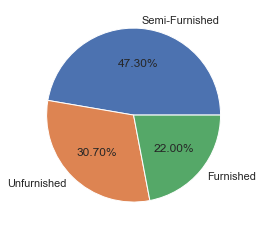

In [21]:
pie=df['furnish_type'].value_counts(normalize=True).round(3)*100
plt.pie(pie,labels=['Semi-Furnished','Unfurnished','Furnished'],autopct='%.2f%%');

In [22]:
df['furnish_type'].value_counts()

Semi-Furnished    63646
Unfurnished       41398
Furnished         29639
Name: furnish_type, dtype: int64

In [23]:
df.nunique()

Property_ID         134683
room                     5
layout_type              2
property_type            6
locality              3706
price                58442
area                  7790
furnish_type             3
bathroom                 5
city                     8
parking_spaces           2
floor                   20
pet_friendly             2
power_backup             2
washing_machine          2
air_conditioner          2
geyser/solar             2
security_deposit     95810
CCTV/security            2
lift                     2
neighbourhood           41
dtype: int64

In [24]:
# df['locality'].nunique()

In [24]:
# location=df.groupby('locality')['locality'].agg('count').sort_values(ascending=False)
# pd.set_option('display.max_rows', None)

In [25]:
# location

In [26]:
# len(location[location<=20])

In [27]:
# location_lessthan_20=location[location<=20]
# location_lessthan_20

In [28]:
# df.locality=df.locality.apply(lambda x:'Other' if x in location_lessthan_20 else x)
# len(df.locality.unique())

# Feature Engineering

# Outliers

In [29]:
# Q3=df.quantile(0.75)
# Q1=df.quantile(0.25)
# IQR=Q3-Q1
# IQR

In [30]:
# df[df.area/df.room<300].head(10)

In [31]:
# df2=df[~(df.area/df.room<300)]
# df2.shape

In [32]:
# df2.price.describe()

In [33]:
# def remove_outliers(df):
#     df_out=pd.DataFrame()
#     for key, sub in df.groupby('locality'):
#         m=np.mean(sub.price)
#         s=np.std(sub.price)
#         reduced=sub[(sub.price>(m-s))&(sub.price<=(m+s))]
#         df_out=pd.concat([df_out,reduced],ignore_index=True)
#     return df_out
# df3=remove_outliers(df2)
# df3.shape

In [34]:
# def plot_scatteer(df,locality):
#     bhk2=df[(df.locality==locality)&(df.room==2)]
#     bhk3=df[(df.locality==locality)&(df.room==3)]
#     bhk4=df[(df.locality==locality)&(df.room==4)]
#     plt.scatter(bhk2.area,bhk2.price,color='blue',label='2BHK',s=50)
#     plt.scatter(bhk3.area,bhk3.price,color='red',label='3BHK',s=50)
#     plt.scatter(bhk4.area,bhk4.price,marker='+',color='green',label='4BHK',s=50)
#     plt.xlabel('Total Square Feet Area')
#     plt.ylabel('Price')
#     plt.title(locality)
#     plt.legend()
# plot_scatteer(df3,'Palavakkam')

In [35]:
# plot_scatteer(df3,'Manikonda')

In [36]:
# df3.bathroom.unique()

In [37]:
# plt.hist(df3.bathroom,rwidth=0.8);

In [38]:
# df3[df3.bathroom>df3.room+2]

In [39]:
# df4=df3[df3.bathroom<df3.room+2]
# df4.shape

In [40]:
# df4.head()

In [41]:
# df4.info()

In [42]:
# corr_matrix = df.corr()[['price']].sort_values('price')
# corr_target = abs(corr_matrix)
# salient_num_features = corr_target.loc[corr_target['price'] > 0.5, :]

In [25]:
df.shape

(134683, 21)

In [9]:
df2=df[df.bathroom>df.room+2].index

In [10]:
df3=df[df.room>df.bathroom+2].index

In [44]:
df3.head(20)

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
6,123183,4,RK,Independent Floor,Airoli,29081,745,Unfurnished,1,Mumbai,...,6,1,1,0,0,0,116324,1,0,1600
35,50347,4,RK,Apartment,New Ashok Nagar,21466,539,Furnished,1,Delhi,...,2,1,1,0,1,1,214660,1,0,3900
136,186805,4,BHK,Independent House,Kharadi,3782,2515,Semi-Furnished,1,Pune,...,19,0,1,1,1,0,18910,0,1,3200
142,88851,5,BHK,Villa,Kothapet,20371,2003,Semi-Furnished,2,Hyderabad,...,8,1,0,1,1,1,81484,1,1,400
597,132056,4,BHK,Apartment,Airoli,46932,483,Unfurnished,1,Mumbai,...,7,1,1,0,0,1,328524,0,1,1900
615,62025,5,BHK,Apartment,Saket,24347,589,Unfurnished,1,Delhi,...,19,0,0,0,0,1,121735,1,1,3900
634,99251,5,BHK,Independent Floor,Salt Lake City,18289,619,Furnished,2,Kolkata,...,12,0,1,0,1,1,73156,0,1,1100
830,51166,5,BHK,Apartment,Sheikh Sarai,19095,1270,Furnished,1,Delhi,...,4,0,0,0,1,1,57285,0,0,1000
1018,39581,4,BHK,Apartment,Dooravani Nagar,6435,3897,Semi-Furnished,1,Bangalore,...,9,1,0,1,1,0,57915,1,1,3600
1108,113007,5,RK,Independent House,Seawoods,23583,608,Unfurnished,1,Mumbai,...,18,0,0,0,0,1,141498,1,1,1700


In [11]:
df4=df[df.room>df.bathroom+1].index

In [72]:
df4.head(10)

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
13,129834,4,BHK,Apartment,Byculla,12209,1499,Furnished,2,Mumbai,...,12,1,1,0,1,0,24418,1,1,700
26,152251,3,BHK,Apartment,Seawoods,19758,2256,Semi-Furnished,1,Mumbai,...,16,1,1,1,1,0,39516,1,1,900
68,161614,3,BHK,Studio Apartment,Goregaon East,21526,1055,Unfurnished,1,Mumbai,...,17,1,0,0,0,1,193734,1,1,2200
82,181700,3,BHK,Apartment,Bavdhan,13816,5077,Semi-Furnished,1,Pune,...,1,0,0,1,1,1,96712,0,0,800
89,104672,3,BHK,Independent Floor,Chembur,14849,334,Unfurnished,1,Mumbai,...,18,0,0,0,0,0,29698,1,1,1000
99,124879,3,BHK,Apartment,Ghansoli,6880,780,Furnished,1,Mumbai,...,5,1,1,0,1,0,13760,0,0,1300
104,81285,3,BHK,Apartment,laxmi nagar,11984,728,Unfurnished,1,Delhi,...,2,1,0,0,0,0,83888,1,0,1100
111,183171,3,BHK,Apartment,Punawale,47784,553,Unfurnished,1,Pune,...,10,0,0,0,0,0,382272,0,1,2900
135,29040,4,BHK,Studio Apartment,Nagarbhavi,43777,540,Furnished,2,Bangalore,...,1,1,0,0,1,0,393993,0,0,3500
143,41658,4,BHK,Apartment,Mugalivakkam,37178,2174,Semi-Furnished,2,Chennai,...,19,1,1,1,1,0,223068,0,1,300


In [8]:
df['price'].mean()

36690.033894403896

In [12]:
df3.shape

(2140,)

In [13]:
df.drop(df4,inplace=True)

In [14]:
# df.drop(df3,inplace=True)

In [15]:
df.drop(df2,inplace=True)

In [16]:
df5=df[df.price>360000]

In [36]:
df5.head(10)

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
5,54308,3,BHK,Apartment,East of Kailash,373931,1096,Semi-Furnished,2,Delhi,...,1,1,0,1,1,0,747862,0,0,3100
19,73453,1,BHK,Apartment,West End,426041,1492,Unfurnished,1,Delhi,...,15,1,1,0,0,0,4260410,1,1,1900
41,126362,1,BHK,Independent Floor,Ulwe,667095,657,Furnished,1,Mumbai,...,13,0,1,0,1,0,6003855,0,1,3900
57,95205,2,BHK,Apartment,New Town,407584,599,Semi-Furnished,3,Kolkata,...,7,1,0,1,1,0,3260672,0,1,1500
367,47359,2,BHK,Apartment,Sholinganallur,599480,2298,Furnished,2,Chennai,...,6,0,0,0,1,1,1198960,0,0,1200
410,123433,2,BHK,Apartment,Sion,388172,659,Furnished,2,Mumbai,...,1,0,0,0,1,0,776344,0,0,1000
618,151943,1,BHK,Independent Floor,Bandra East,670853,1369,Semi-Furnished,2,Mumbai,...,16,1,1,1,1,1,4695971,1,1,3000
748,66291,2,BHK,Independent Floor,Niti Bagh,568849,1395,Furnished,1,Delhi,...,18,0,0,0,1,0,2275396,0,1,2900
778,134043,1,BHK,Apartment,Kurla,382625,2075,Semi-Furnished,2,Mumbai,...,10,1,0,1,1,0,3443625,1,1,900
829,130696,1,RK,Independent Floor,Chembur,407057,642,Unfurnished,3,Mumbai,...,9,0,1,0,0,0,2035285,0,1,2100


In [37]:
df.shape

(119794, 21)

In [38]:
df.shape

(119794, 21)

In [17]:
# dropping unwanted columns
# df.drop('security_deposit',axis='columns',inplace=True)
# df.drop('neighbourhood',axis='columns',inplace=True)
df.drop('Property_ID',axis='columns',inplace=True)

In [18]:
# df.drop('security_deposit',axis='columns',inplace=True)

In [19]:
df.shape

(119794, 20)

In [20]:
df.isna().sum()

room                0
layout_type         0
property_type       0
locality            0
price               0
area                0
furnish_type        0
bathroom            0
city                0
parking_spaces      0
floor               0
pet_friendly        0
power_backup        0
washing_machine     0
air_conditioner     0
geyser/solar        0
security_deposit    0
CCTV/security       0
lift                0
neighbourhood       0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
df.nunique()

room                    5
layout_type             2
property_type           6
locality             3557
price               55328
area                 7424
furnish_type            3
bathroom                5
city                    8
parking_spaces          2
floor                  20
pet_friendly            2
power_backup            2
washing_machine         2
air_conditioner         2
geyser/solar            2
security_deposit    88128
CCTV/security           2
lift                    2
neighbourhood          41
dtype: int64

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
room,119794.0,1.919403,0.826308,1.0,1.0,2.0,3.00,5.0
price,119794.0,36653.293345,62100.574874,1583.0,12105.0,20993.5,36167.75,799325.0
area,119794.0,1480.092050,1400.712167,81.0,762.0,1124.0,1585.00,13942.0
bathroom,119794.0,2.021362,0.778051,1.0,2.0,2.0,2.00,5.0
parking_spaces,119794.0,0.534943,0.498780,0.0,0.0,1.0,1.00,1.0
floor,119794.0,9.144089,5.947189,0.0,4.0,9.0,15.00,19.0
pet_friendly,119794.0,0.527197,0.499262,0.0,0.0,1.0,1.00,1.0
power_backup,119794.0,0.335209,0.472065,0.0,0.0,0.0,1.00,1.0
washing_machine,119794.0,0.478663,0.499547,0.0,0.0,0.0,1.00,1.0
air_conditioner,119794.0,0.697556,0.459318,0.0,0.0,1.0,1.00,1.0


In [46]:
df.nunique()

room                    5
layout_type             2
property_type           6
locality             3557
price               55328
area                 7424
furnish_type            3
bathroom                5
city                    8
parking_spaces          2
floor                  20
pet_friendly            2
power_backup            2
washing_machine         2
air_conditioner         2
geyser/solar            2
security_deposit    88128
CCTV/security           2
lift                    2
neighbourhood          41
dtype: int64

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data=df
data.layout_type=label.fit_transform(data.layout_type)
data.property_type=label.fit_transform(data.property_type)
data.locality=label.fit_transform(data.locality)
data.furnish_type=label.fit_transform(data.furnish_type)
data.city=label.fit_transform(data.city)
data

,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,3,0,2,2243,33624,1312,0,2,2,1,1,1,0,0,1,0,302616,0,0,300
1,1,0,0,1822,9655,1474,2,2,4,0,17,0,1,0,0,1,19310,0,1,1600
2,3,0,0,1274,23699,1837,1,2,5,0,10,1,1,1,1,0,118495,0,1,3100
3,1,0,0,593,6306,606,2,1,6,0,18,0,0,0,0,0,37836,0,1,300
4,1,0,4,1340,12008,498,1,3,7,0,14,0,0,1,1,0,72048,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134677,3,0,0,384,8778,678,2,2,5,0,9,0,0,0,0,0,70224,1,1,1800
134679,1,0,1,219,6958,619,2,2,7,0,2,1,1,0,0,1,62622,0,0,1200
134680,3,0,0,325,85812,2279,1,3,6,1,5,0,1,1,1,0,429060,0,0,3900
134681,1,0,0,1112,15919,1314,2,2,7,0,14,0,1,0,0,0,79595,0,1,2300


# Modeling 


In [22]:
x=df.drop(['price'],axis='columns')
y=df['price']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,roc_auc_score,mean_squared_error,roc_curve
from sklearn.metrics import accuracy_score

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [25]:
def display_R2_scores(model, x_train, y_train, x_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, x_train, y_train).mean(),4)}.')
    print(f'The training score for this model is {round(model.score(x_train, y_train), 4)}.')
    print(f'The testing score for this model is {round(model.score(x_test, y_test),4)}.')

In [26]:
model=LinearRegression()
model.fit(x_train,y_train)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)
display_R2_scores(model, x_train, y_train, x_test, y_test)

The mean cross validation score for this model is 0.8007.
The training score for this model is 0.8012.
The testing score for this model is 0.8095.


In [53]:
dr = DummyRegressor()
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.25,random_state=10)
dr.fit(x_train_1, y_train_1);
display_R2_scores(dr, x_train_1, y_train_1, x_test_1, y_test_1)

The mean cross validation score for this model is -0.0001.
The training score for this model is 0.0.
The testing score for this model is -0.0.


In [54]:
# lasso = Lasso(alpha = 5000, max_iter = 4000)
# lasso.fit(x_train_1, y_train_1);

In [28]:
import sklearn.metrics as m
y_test_pred=model.predict(x_test)
print("Mean absolute error =", round(m.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(m.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(m.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(m.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(m.r2_score(y_test, y_test_pred), 2))
print('RMSE:', np.sqrt(m.mean_squared_error(y_test,y_test_pred)))

Mean absolute error = 12493.85
Mean squared error = 731522298.82
Median absolute error = 7091.6
Explain variance score = 0.81
R2 score = 0.81
RMSE: 27046.668904382048


In [91]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
c=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y)

array([0.80393844, 0.80282829, 0.80592888, 0.78985657, 0.81287859])

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [101]:
#lasso
x_train_5,x_test_5,y_train_5,y_test_5=train_test_split(x,y,test_size=0.25,random_state=10)
lasso=Lasso()
lasso.fit(x_train_5,y_train_5)
y_test_pred_3=lasso.predict(x_test_5)

In [114]:
#Decision tree
x_train_6,x_test_6,y_train_6,y_test_6=train_test_split(x,y,test_size=0.25,random_state=10)
tree=DecisionTreeRegressor()
tree.fit(x_train_6,y_train_6)
y_test_pred_4=tree.predict(x_test_6)

In [116]:
print("Mean absolute error =", round(m.mean_absolute_error(y_test_6, y_test_pred_4), 2)) 
print("Mean squared error =", round(m.mean_squared_error(y_test_6, y_test_pred_4), 2)) 
print("Median absolute error =", round(m.median_absolute_error(y_test_6, y_test_pred_4), 2)) 
print("Explain variance score =", round(m.explained_variance_score(y_test_6, y_test_pred_4), 2)) 
print("R2 score =", round(m.r2_score(y_test_6, y_test_pred_4), 2))
print('RMSE:', np.sqrt(m.mean_squared_error(y_test_6,y_test_pred_4)))

Mean absolute error = 17099.97
Mean squared error = 1537856646.52
Median absolute error = 7285.0
Explain variance score = 0.6
R2 score = 0.6
RMSE: 39215.5153799638


# Hyperparameter Tuning

In [48]:
def best_model(x,y):
    a={
        'linear_Regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'Decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedmen_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    c=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for a, config in a.items():
        g=GridSearchCV(config['model'],config['params'],return_train_score=False)
        g.fit(x,y)
        scores.append({
            'model': a,
            'best_score': g.best_score_,
            'best_params': g.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [49]:
best_model(x,y)

,model,best_score,best_params
0,linear_Regression,0.805041,{'normalize': True}
1,lasso,0.805040,"{'alpha': 2, 'selection': 'cyclic'}"
2,Decision_tree,0.601697,"{'criterion': 'mse', 'splitter': 'best'}"


In [50]:
#Random Forest Regressor

In [93]:
l = RandomForestRegressor()
x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(x,y,test_size=0.25,random_state=10)
l.fit(x_train_3, y_train_3);
display_R2_scores(l, x_train_3, y_train_3, x_test_3, y_test_3)

The mean cross validation score for this model is 0.7987.
The training score for this model is 0.9719.
The testing score for this model is 0.8015.


In [94]:
import sklearn.metrics as m
y_test_pred_1=l.predict(x_test_3)
print("Mean absolute error =", round(m.mean_absolute_error(y_test_3, y_test_pred_1), 2)) 
print("Mean squared error =", round(m.mean_squared_error(y_test_3, y_test_pred_1), 2)) 
print("Median absolute error =", round(m.median_absolute_error(y_test_3, y_test_pred_1), 2)) 
print("Explain variance score =", round(m.explained_variance_score(y_test_3, y_test_pred_1), 2)) 
print("R2 score =", round(m.r2_score(y_test_3, y_test_pred_1), 2))
print('RMSE:', np.sqrt(m.mean_squared_error(y_test_3,y_test_pred_1)))

Mean absolute error = 13125.52
Mean squared error = 762135978.41
Median absolute error = 6915.55
Explain variance score = 0.8
R2 score = 0.8
RMSE: 27606.810362869644


In [55]:
regressor = LinearRegression(fit_intercept=False)
regressor.fit(x_train, y_train)
print(f'r_sqr value: {regressor.score(x_train, y_train)}')

r_sqr value: 0.8066861926370577


In [53]:
#support vector Machine

In [95]:
from sklearn.svm import SVR
s=SVR()
x_train_4,x_test_4,y_train_4,y_test_4=train_test_split(x,y,test_size=0.25,random_state=10)
s.fit(x_train_4, y_train_4);
display_R2_scores(l, x_train_4, y_train_4, x_test_4, y_test_4)

The mean cross validation score for this model is 0.7988.
The training score for this model is 0.9719.
The testing score for this model is 0.8015.


In [96]:
import sklearn.metrics as m
y_test_pred_2=l.predict(x_test_4)
print("Mean absolute error =", round(m.mean_absolute_error(y_test_4, y_test_pred_2), 2)) 
print("Mean squared error =", round(m.mean_squared_error(y_test_4, y_test_pred_2), 2)) 
print("Median absolute error =", round(m.median_absolute_error(y_test_4, y_test_pred_2), 2)) 
print("Explain variance score =", round(m.explained_variance_score(y_test_4, y_test_pred_2), 2)) 
print("R2 score =", round(m.r2_score(y_test_4, y_test_pred_2), 2))
print('RMSE =', round(m.mean_squared_error(y_test_4,y_test_pred_2),2))
print('RMSE:', np.sqrt(m.mean_squared_error(y_test_4,y_test_pred_2)))

Mean absolute error = 13125.52
Mean squared error = 762135978.41
Median absolute error = 6915.55
Explain variance score = 0.8
R2 score = 0.8
RMSE = 762135978.41
RMSE: 27606.810362869644


In [110]:
compare=({
    'Model': ['linear Regression','Random forest regressor','support vector machine','lasso'],
    'Train Score': [model.score(x_train,y_train),
                   l.score(x_train_3,y_train_3),
                   s.score(x_train_4,y_train_4),
                   lasso.score(x_train_5,y_train_5)],
    'Test Score': [model.score(x_test,y_test),
                  l.score(x_test_3,y_test_3),
                  s.score(x_test_4,y_test_4),
                  lasso.score(x_test_5,y_test_5)],
    'R2 Score': [m.r2_score(y_test, y_test_pred),
                m.r2_score(y_test_3, y_test_pred_1),
                m.r2_score(y_test_4, y_test_pred_2),
                m.r2_score(y_test_5, y_test_pred_3)]})

In [112]:
f=pd.DataFrame(compare)

In [113]:
f

,Model,Train Score,Test Score,R2 Score
0,linear Regression,0.801191,0.809473,0.809473
1,Random forest regressor,0.971858,0.801500,0.801500
2,support vector machine,0.030436,0.029685,0.801500
3,lasso,0.801191,0.809473,0.809473


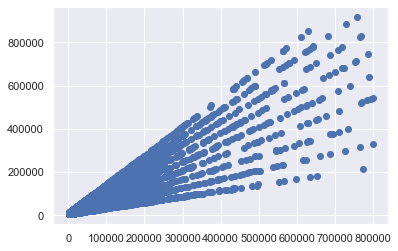

In [29]:
#Linear Regression 
plt.scatter(y_test,y_test_pred);

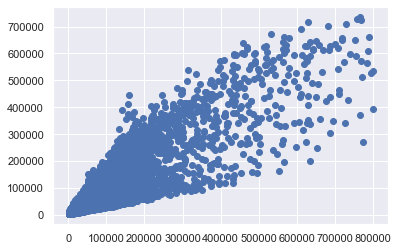

In [118]:
#Random Forest
plt.scatter(y_test_3,y_test_pred_1);

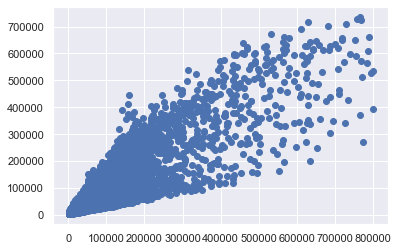

In [119]:
#SVR
plt.scatter(y_test_4,y_test_pred_2);

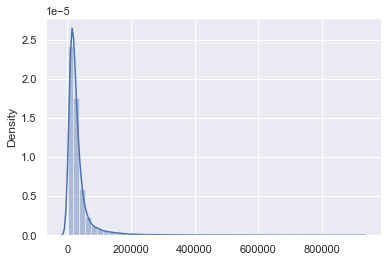

In [120]:
sns.distplot((y_test,y_test_pred),bins=50);

# Test data

In [30]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data=df1
data.layout_type=label.fit_transform(data.layout_type)
data.property_type=label.fit_transform(data.property_type)
data.locality=label.fit_transform(data.locality)
data.furnish_type=label.fit_transform(data.furnish_type)
data.city=label.fit_transform(data.city)
data

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,114342,2,0,1,1753,1347,1,1,6,0,...,0,1,1,1,0,72624,1,0,900,NaN
1,88819,1,0,2,2316,634,1,3,4,1,...,0,0,1,1,0,19656,0,0,2500,NaN
2,85623,1,0,0,2458,524,2,1,4,1,...,1,1,0,0,0,7500,0,0,3200,NaN
3,130856,3,0,0,2420,1837,2,5,6,1,...,1,0,0,0,1,137646,1,1,1200,NaN
4,40089,2,0,0,1238,1208,1,2,1,1,...,0,1,1,1,0,110898,0,1,1000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57717,132027,3,0,0,519,1628,1,2,6,1,...,0,0,1,1,0,77049,0,0,2900,NaN
57718,86405,1,0,0,1196,729,2,1,4,0,...,1,0,0,0,0,29074,1,0,3100,NaN
57719,16233,3,1,1,427,897,0,3,0,1,...,1,1,0,1,1,188088,1,1,1100,NaN
57720,63020,3,0,1,2494,2229,2,1,3,0,...,1,1,0,0,0,103938,0,0,1500,NaN


In [31]:
df1.drop('Property_ID',axis='columns',inplace=True)

In [32]:
df6=df1[df1.bathroom>df1.room+2]
df6.head()

,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
29,1,1,2,2595,608,1,4,6,0,5,1,0,1,1,1,280233,1,0,1500,NaN
67,1,1,0,712,1196,2,4,3,1,7,0,0,0,0,0,101526,1,1,1200,NaN
71,2,0,0,2415,1282,1,5,0,0,4,1,0,1,1,0,104678,1,0,2000,NaN
78,1,0,1,2134,1236,2,4,6,0,4,1,1,0,0,1,30762,0,0,3900,NaN
135,2,0,3,443,521,1,5,6,1,16,0,0,1,1,0,41385,1,1,1100,NaN


In [33]:
df1.shape

(57722, 20)

In [34]:
df7=df1[df1.bathroom>df1.room+2].index
df7.shape

(1731,)

In [35]:
df8=df1[df1.room>df1.bathroom+2]
df8.head()

,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
8,5,1,0,237,1694,1,2,6,0,19,0,0,1,1,1,197561,1,1,1100,NaN
51,4,0,0,2494,818,2,1,3,1,8,1,1,0,0,1,82369,0,1,900,NaN
98,4,0,0,1063,737,2,1,1,0,13,1,0,0,0,0,76272,1,1,3600,NaN
192,4,0,0,119,446,1,1,6,1,8,0,0,1,1,0,17892,0,1,2200,NaN
201,4,0,4,368,718,1,1,0,0,18,1,1,1,1,1,125705,1,1,700,NaN


In [36]:
df9=df1[df1.room>df1.bathroom+2].index

In [37]:
df1.drop(df9,inplace=True)

In [38]:
df1.shape

(56809, 20)

In [39]:
df1.drop(df7,inplace=True)

In [40]:
df1.shape

(55078, 20)

In [41]:
df1.isna().sum()

room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               55078
dtype: int64

In [68]:
df.duplicated().sum()

0

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119794 entries, 0 to 134682
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   room              119794 non-null  int64
 1   layout_type       119794 non-null  int32
 2   property_type     119794 non-null  int32
 3   locality          119794 non-null  int32
 4   price             119794 non-null  int64
 5   area              119794 non-null  int64
 6   furnish_type      119794 non-null  int32
 7   bathroom          119794 non-null  int64
 8   city              119794 non-null  int32
 9   parking_spaces    119794 non-null  int64
 10  floor             119794 non-null  int64
 11  pet_friendly      119794 non-null  int64
 12  power_backup      119794 non-null  int64
 13  washing_machine   119794 non-null  int64
 14  air_conditioner   119794 non-null  int64
 15  geyser/solar      119794 non-null  int64
 16  security_deposit  119794 non-null  int64
 17  CCTV/secur

In [42]:
df1.drop(['price'],axis='columns',inplace=True)

In [43]:
# df1.drop('security_deposit',axis='columns',inplace=True)

In [44]:
#factors that will predict the Result

desired_factors = ['room','property_type','property_type',
                   'locality','area','furnish_type','bathroom','bathroom','city','parking_spaces','floor','pet_friendly','power_backup','washing_machine','air_conditioner','geyser/solar',
                   'security_deposit','CCTV/security','lift','neighbourhood']

#set my model to LinearRegression

models = LinearRegression()

#set prediction data to factors that will predict, and set target to Result

train_data = df[desired_factors]
test_data = df1[desired_factors]
target = df.price

#fitting model with prediction data and telling it my target

models.fit(train_data, target)
r=models.predict(test_data)

In [45]:
new=pd.DataFrame(r)
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55078 entries, 0 to 55077
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       55078 non-null  float64
dtypes: float64(1)
memory usage: 430.4 KB


In [141]:
new.to_csv(r'C:\Users\DELL\Desktop\submit.csv', index=False)

In [46]:
actual_predict=pd.DataFrame({'Real':y_test,'Predict':y_test_pred.reshape(-1)})
actual_predict

,Real,Predict
23069,47866,52586.300812
132176,41623,40758.765708
133436,13098,24079.362588
3697,4048,12394.496716
122786,90807,31400.878212
...,...,...
64201,30036,19533.492913
124162,32058,30080.727715
118870,4812,9464.351131
109832,8368,9031.476213


In [47]:
actual_predict=actual_predict.astype(int)

In [48]:
#Linear Regression
actual_predict.to_csv(r'C:\Users\DELL\Desktop\actual_predicted_1.csv', index=False)

In [46]:
print("Train data",model.score(x_train,y_train))

Train data 0.8066861926370577


In [47]:
print("Test data",model.score(x_test,y_test))

Test data 0.8007286588494822


In [48]:
print('accuracy',r2_score(y_test,y_test_pred))

accuracy 0.8007286588494822


In [49]:
#Random Forest Regressor
actual_predict_1=pd.DataFrame({'Real':y_test_3,'Predict':y_test_pred_1.reshape(-1)})
actual_predict_1

NameError: name 'y_test_3' is not defined

In [50]:
actual_predict_1.to_csv(r'C:\Users\DELL\Desktop\actual_predicted_1.csv', index=False)

NameError: name 'actual_predict_1' is not defined